In [8]:
from google.cloud import bigquery
from google.cloud.bigquery import job
import pandas as pd
import os
from tqdm import tqdm
import pandas as pd
PROJCECT = 'ballosodeuk'
bq = bigquery.Client(project=PROJCECT)
import statsmodels.api as sm 
import numpy as np

c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  raise Exception("You need either charset_normalizer or chardet installed")


In [267]:
query_name = "1024_쇼핑구매자"
query_name = "1017_쿠폰구매데이터"


In [268]:
# 클라이언트 설정
client = bigquery.Client()

# SQL 파일 읽기
# file = './query/쿠팡0403_0509.sql'
file = f'../query/{query_name}.sql'
with open(file, 'r') as file:
    query = file.read()


In [269]:
job_config = bigquery.QueryJobConfig()
query_job = client.query(query, job_config=job_config)

In [270]:
df = query_job.to_dataframe()

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [132]:
purchaseer = query_job.to_dataframe()

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [271]:
# # df.to_parquet('./0503_1022_earningSpending.parquet')
df.to_parquet('./0901_1022_earningSpending.parquet')
# # purchaseer.to_parquet('./1018_1024_purchase.parquet')

In [9]:
df = pd.read_parquet('./0901_1022_earningSpending.parquet')
purchaseer = pd.read_parquet('./1018_1024_purchase.parquet')

In [10]:
df.rename(columns={'9000-12999':'9000-10999'},inplace=True)
df.entropy.mean()


0.19005339100974042

In [273]:
df.columns

Index(['User_ID', 'Mean_Spend_Ratio', 'Interval_Days', 'entropy', '0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -'],
      dtype='object')

- 통계치

In [274]:
def ci_stats(df,col):
    mean = df[col].mean()
    std = df[col].std()
    n = len(df)
    ci_upper = mean + 1.96 * std / np.sqrt(n)
    ci_lower = mean - 1.96 * std / np.sqrt(n)
    
    return round(mean,2), round(ci_upper,2), round(ci_lower,2)

spend_ratio = ci_stats(df,'Mean_Spend_Ratio')
entropy = ci_stats(df,'entropy')
Interval_Days = ci_stats(df,'Interval_Days')

print(spend_ratio, entropy, Interval_Days)

(0.65, 0.65, 0.64) (0.19, 0.19, 0.19) (1.73, 1.76, 1.7)


In [275]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
tst = df[['Mean_Spend_Ratio','entropy']]

tst_scaled = sc.fit_transform(tst)
pd.DataFrame(tst_scaled).corr()

,0,1
0,1.000000,-0.022586
1,-0.022586,1.000000


In [276]:
df

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,23000 - 24999,25000 - 26999,27000 - 28999,29000 - 30999,31000 - 32999,33000 - 34999,35000 - 36999,37000 - 38999,39000 - 40999,41000 -
0,7ff3800d-9fe5-4052-996a-c9fb9ca7dd3a,0.375688,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30b10f2e-f3d0-49eb-991b-7bcdaf453e99,0.362777,0.5,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45d34e19-2fce-44a0-aefc-cbe23b1f46f8,0.756656,15.0,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,729c760c-9a08-4628-b976-79c23bbba669,1.000000,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a037745e-ec73-4003-b900-a4fde2e0ef24,0.289314,15.5,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66111,3350bfe3-cef1-4452-9c6e-5120f070804c,0.000000,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66112,eab02a63-2958-4936-a922-6e3637a923f2,1.000000,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66113,4932a0c1-51a1-4e10-871c-2cb8a6bddf41,0.797109,0.0,0.0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
66114,58cbb2a5-5753-4403-9fdc-48387c2bc048,0.000000,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 소비 강도의 증가에 따른 구매금액 범주 속할 확률 증가분

#### 1만원 이하 구매자의 경우, 탕진 확률이 낮다. 이상의 경우, 탕진 확률이 높다


#### 9월 소량 데이터
- print(np.exp(low_coef)) #1.1만원 이하 -> 강도 증가 시 0.14 배 낮아짐
- print(np.exp(low_mid)) #2.1만원 이하 -> 강도 증가 시 2.15배 높아짐
- print(np.exp(mid)) #3.1만원 이하 -> 강도 증가 시 12배 높아짐
- print(np.exp(high)) #4.1 만 이하, 이상 -> 강도 증가 시 30배 높아짐

#### 5~10월 전체 (16만명)
- 1.1만원 이하 : 강도 증가 시 0.04배 낮아짐
- 2.1만원 이하 : 강도 증가 시 1.78배 높아짐
- 3.1만원 이하 : 강도 증가 시 3.88배 높아짐
- 4.1만원 이하 : 강도 증가 시 15.4배 높아짐

>1. 따라서, 1.1만원 이하 구매의 경우 한탕 소진이 아니다. <br>
>2. 이 이상 높아질 시, 한탕 소진으로 모든 금액을 소진할 확률이 높다.
>3. 큰 쿠폰 구매자는 돈을 모아서 도달하고, 소액 쿠폰 구매는 잔액을 거의 대부분 남겨놓는 경향이 있다.
>4. 이 금액이 쇼핑지원금 타겟이다

In [11]:
def pre_prep(df):
    df['low'] = df[['0-1000', '1000-2999', '3000-4999', '5000-6999','7000-8999', '9000-10999', ]].sum(axis=1)
    df['low-mid'] = df[['11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999', '19000 - 20999']].sum(axis=1)
    df['mid'] = df[['21000 - 22999', '23000 - 24999', '25000 - 26999', '27000 - 28999','29000 - 30999']].sum(axis=1)
    df['high'] = df[['31000 - 32999', '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -']].sum(axis=1)

    df_ = df[['User_ID','Mean_Spend_Ratio','low','low-mid','mid','high']].copy()
    df_ = df_[df_['Mean_Spend_Ratio'].notna()]
    df_ = df_.dropna(subset=['Mean_Spend_Ratio'])  # 결측값 제거
    df_ = df_[~df_['Mean_Spend_Ratio'].isin([float('inf'), -float('inf')])] 

    return df_

In [12]:
def logit_func(df_):
    X = df_['Mean_Spend_Ratio']
    y = df_.iloc[:,2:]
    y['low'] = y['low'].apply(lambda x : 1 if x > 1 else x)
    y['low-mid'] = y['low-mid'].apply(lambda x : 1 if x > 1 else x)
    y['mid'] = y['mid'].apply(lambda x : 1 if x > 1 else x)
    y['high'] = y['high'].apply(lambda x : 1 if x > 1 else x)

    results = {}
    for column in y.columns:
        y_column = y[column]
        X_with_const = sm.add_constant(X)
        model = sm.Logit(y_column, X_with_const).fit()
        results[column] = model.summary()

    return results


In [13]:
import pandas as pd
import numpy as np

def get_results(results):
    extracted_results = {}
    for column, summary in results.items():
        # summary.tables[1]에서 계수와 p-value 추출
        # 첫 번째 행은 상수항이므로, 두 번째 행부터 시작
        for i in range(1, len(summary.tables[1].data)):  # 첫 번째 행(상수항)을 제외하고 반복
            coef = summary.tables[1].data[i][1]  # 계수
            p_value = summary.tables[1].data[i][4]  # p-value
            variable_name = summary.tables[1].data[i][0]  # 변수 이름
            extracted_results[f"{column}_{variable_name}"] = {'coef': coef, 'p-value': p_value}        

    # DataFrame 생성
    df = pd.DataFrame(extracted_results).T

    # odds-ratio 계산
    def safe_exp(x):
        try:
            # x를 float로 변환
            float_x = float(x)
            return np.exp(float_x)  # exp 적용
        except (ValueError, TypeError):
            return np.nan  # 변환 불가능한 경우 NaN 반환

    df['odds-ratio'] = df['coef'].apply(safe_exp)
        
    return df

In [14]:
tt = pre_prep(df) 
tt.iloc[:,2:]

,low,low-mid,mid,high
0,1,0,0,0
1,2,0,0,0
2,2,0,0,0
3,1,0,0,0
4,2,0,0,0
...,...,...,...,...
66111,1,0,0,0
66112,1,0,0,0
66113,3,0,0,0
66114,1,0,0,0


In [208]:
df_result = get_results(logit_func(pre_prep(df)))
df_result

Optimization terminated successfully.
         Current function value: 0.467152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404493
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.186207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.386204
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.6992,0.000,40.414959
low_Mean_Spend_Ratio,-3.1532,0.000,0.042715
low-mid_const,-2.2111,0.000,0.109580
low-mid_Mean_Spend_Ratio,0.5770,0.000,1.780688
mid_const,-3.9946,0.000,0.018415
mid_Mean_Spend_Ratio,1.3496,0.000,3.855883
high_const,-3.8289,0.000,0.021734
high_Mean_Spend_Ratio,2.7194,0.000,15.171217


In [12]:
# 전체 5/3 ~ 10/22
df_result = get_results(logit_func(pre_prep(df)))
df_result

Optimization terminated successfully.
         Current function value: 0.467152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404493
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.186207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.386204
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.6992,0.000,40.414959
low_Mean_Spend_Ratio,-3.1532,0.000,0.042715
low-mid_const,-2.2111,0.000,0.109580
low-mid_Mean_Spend_Ratio,0.5770,0.000,1.780688
mid_const,-3.9946,0.000,0.018415
mid_Mean_Spend_Ratio,1.3496,0.000,3.855883
high_const,-3.8289,0.000,0.021734
high_Mean_Spend_Ratio,2.7194,0.000,15.171217


In [212]:
df = df[(df['Mean_Spend_Ratio']>0.0)]
len(df)
df_result = get_results(logit_func(pre_prep(df)))
df_result
#소비 이력 없는 유저 제외

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low'] = df[['0-1000', '1000-2999', '3000-4999', '5000-6999','7000-8999', '9000-10999', ]].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low-mid'] = df[['11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999', '19000 - 20999']].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.p

Optimization terminated successfully.
         Current function value: 0.488692
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.417896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.194043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402756
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.5682,0.000,35.452721
low_Mean_Spend_Ratio,-3.0023,0.000,0.049673
low-mid_const,-1.8792,0.000,0.152712
low-mid_Mean_Spend_Ratio,0.1727,0.000,1.188509
mid_const,-3.7788,0.000,0.022850
mid_Mean_Spend_Ratio,1.0957,0.000,2.991276
high_const,-3.7263,0.000,0.024082
high_Mean_Spend_Ratio,2.6016,0.000,13.485297


### 엔트로피 구간 별 통계

In [213]:
df

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,31000 - 32999,33000 - 34999,35000 - 36999,37000 - 38999,39000 - 40999,41000 -,low,low-mid,mid,high
0,39867749-164c-43cc-8433-4cc0daa17956,0.875367,11.00,0.00,0,2,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,1fe76913-af99-4177-98d4-1f6b0bef1dbf,0.694106,17.75,1.38,0,0,0,4,2,1,...,0,0,0,0,0,0,7,0,0,0
3,23cc23d1-e38a-4d11-854d-e005a88bd41f,1.000000,72.50,1.00,0,0,1,1,0,0,...,0,0,0,0,0,0,2,0,0,0
4,060764f0-51cf-468f-9029-84729dca69e8,0.890869,0.00,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,19570a6b-efd9-4273-8466-fa1192a32c89,0.638370,1.50,0.00,0,0,3,0,0,0,...,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163933,1059813e-9bd6-45ae-ba23-572bd604a39c,0.973611,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
163934,ff7556e4-88e7-4e2c-8247-f3084bc7d5f4,0.933672,0.00,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
163935,d6103d4a-bd38-44e5-9ca1-bff3fc628fb3,0.451592,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
163936,84cfd59a-0b64-4b01-87e4-2c024d2b648b,0.626040,0.00,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [214]:
df.entropy.min(), df.entropy.max(), df.Mean_Spend_Ratio.min(), df.Mean_Spend_Ratio.max()

(0.0, 3.23, 0.0015611827520529552, 1.0)

In [215]:
def entropy_pv(df):
    # entropy 구간 설정
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4]  # 구간 설정
    labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.2', 
            '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4',
            '2.4-2.6','2.6-2.8','2.8-3.0','3.0-3.2','3.2-3.4']  # 구간 레이블
    df['entropy_bins'] = pd.cut(df['entropy'], bins=bins, labels=labels, right=False)
    
    # 각 구간별 유저 수와 구매 횟수 집계
    result = df.groupby('entropy_bins').agg(
        user_count=('User_ID', 'nunique'),  # 유저 수
        Mean_Spend_Ratio=('Mean_Spend_Ratio','mean'),
        Interval_Days=('Interval_Days','mean'),
        low=('low', 'sum'),  # 총 구매 횟수
        low_mid=('low-mid', 'sum'),  # 총 구매 횟수
        mid=('mid', 'sum'),  # 총 구매 횟수
        high=('high', 'sum'),  # 총 구매 횟수
    ).reset_index()

    # 결과 출력
    return pd.DataFrame(result)

entropy_pv(df)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\4038178648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entropy_bins'] = pd.cut(df['entropy'], bins=bins, labels=labels, right=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\4038178648.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('entropy_bins').agg(


,entropy_bins,user_count,Mean_Spend_Ratio,Interval_Days,low,low_mid,mid,high
0,0-0.2,93359,0.743405,4.824369,124675,10823,4217,16982
1,0.2-0.4,134,0.546698,12.343057,2204,5,1,22
2,0.4-0.6,1112,0.577335,18.559463,9771,53,9,29
3,0.6-0.8,2227,0.599471,22.396495,13120,228,34,78
4,0.8-1.0,14301,0.644952,23.523977,50067,3004,491,925
5,1.0-1.2,20516,0.684742,21.292003,36448,6089,1615,3246
6,1.2-1.4,1768,0.577453,23.222124,10633,396,65,116
7,1.4-1.6,8723,0.637908,25.644822,29179,3692,678,995
8,1.6-1.8,378,0.533755,20.822334,2718,140,27,40
9,1.8-2.0,1004,0.572844,24.296755,5349,534,69,107


In [216]:
def spend_power_pv(df):

    # df = df[~df['Mean_Spend_Ratio'].isna()]
    df['spend_cnt'] = df.iloc[:,-6:-2].sum(axis=1)

    # entropy 구간 설정
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0]  # 구간 설정
    labels = [
        '0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5',
        '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0'
        ]  # 구간 레이블
    df['spend_power_bins'] = pd.cut(df['Mean_Spend_Ratio'], bins=bins, labels=labels, right=True)

    # 각 구간별 유저 수와 구매 횟수 집계
    result = df.groupby('spend_power_bins').agg(
        user_count=('User_ID', 'nunique'),  # 유저 수
        entropy=('entropy','mean'),
        Interval_Days=('Interval_Days','mean'),
        total_counts=('spend_cnt','sum'),
        low=('low', 'sum'),  # 총 구매 횟수
        low_mid=('low-mid', 'sum'),  # 총 구매 횟수
        mid=('mid', 'sum'),  # 총 구매 횟수
        high=('high', 'sum'),  # 총 구매 횟수
    ).reset_index()

    # 결과 출력
    return(pd.DataFrame(result))

spend_power_pv(df)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_cnt'] = df.iloc[:,-6:-2].sum(axis=1)


C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_power_bins'] = pd.cut(df['Mean_Spend_Ratio'], bins=bins, labels=labels, right=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('spend_power_bins').agg(


,spend_power_bins,user_count,entropy,Interval_Days,total_counts,low,low_mid,mid,high
0,0-0.1,2545,0.267796,9.096764,5876,5785,69,7,34
1,0.1-0.2,5927,0.377442,10.993121,16249,15822,341,43,78
2,0.2-0.3,6814,0.484538,12.603553,20122,18845,1045,137,231
3,0.3-0.4,8207,0.562041,13.974242,25111,22892,1673,345,498
4,0.4-0.5,10140,0.625748,15.293377,29507,26303,2249,541,1254
5,0.5-0.6,11518,0.551206,14.053452,32491,28866,2591,614,1387
6,0.6-0.7,13526,0.494806,14.254714,36564,32286,3013,717,1704
7,0.7-0.8,16296,0.403213,13.611379,39724,34809,3330,833,2294
8,0.8-0.9,20321,0.345520,12.071779,42754,36599,3737,1181,3548
9,0.9-1.0,49231,0.248970,7.160654,81473,66115,7690,2951,11729


In [217]:
a = df[(df['Mean_Spend_Ratio']<=0.0) & (df['Mean_Spend_Ratio']<=0.1)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.1) & (df['Mean_Spend_Ratio']<=0.2)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.2) & (df['Mean_Spend_Ratio']<=0.3)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.3) & (df['Mean_Spend_Ratio']<=0.4)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.4) & (df['Mean_Spend_Ratio']<=0.5)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.5) & (df['Mean_Spend_Ratio']<=0.6)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.6) & (df['Mean_Spend_Ratio']<=0.7)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.7) & (df['Mean_Spend_Ratio']<=0.8)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.8) & (df['Mean_Spend_Ratio']<=0.9)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.9) & (df['Mean_Spend_Ratio']<=1.0)].User_ID.nunique()
print(a)

141980


In [218]:
df.head(1)

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,37000 - 38999,39000 - 40999,41000 -,low,low-mid,mid,high,entropy_bins,spend_cnt,spend_power_bins
0,39867749-164c-43cc-8433-4cc0daa17956,0.875367,11.0,0.0,0,2,0,0,0,0,...,0,0,0,2,0,0,0,0-0.2,2,0.8-0.9


In [219]:
df.iloc[:,4:-7].columns
# df.head(1)

Index(['0-1000', '1000-2999', '3000-4999', '5000-6999', '7000-8999',
       '9000-10999', '11000 - 12999', '13000 - 14999', '15000 - 16999',
       '17000 - 18999', '19000 - 20999', '21000 - 22999', '23000 - 24999',
       '25000 - 26999', '27000 - 28999', '29000 - 30999', '31000 - 32999',
       '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999',
       '41000 -'],
      dtype='object')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))
# sns.kdeplot(data=df, x='Mean_Spend_Ratio', hue='spend_power_bins')


c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-package

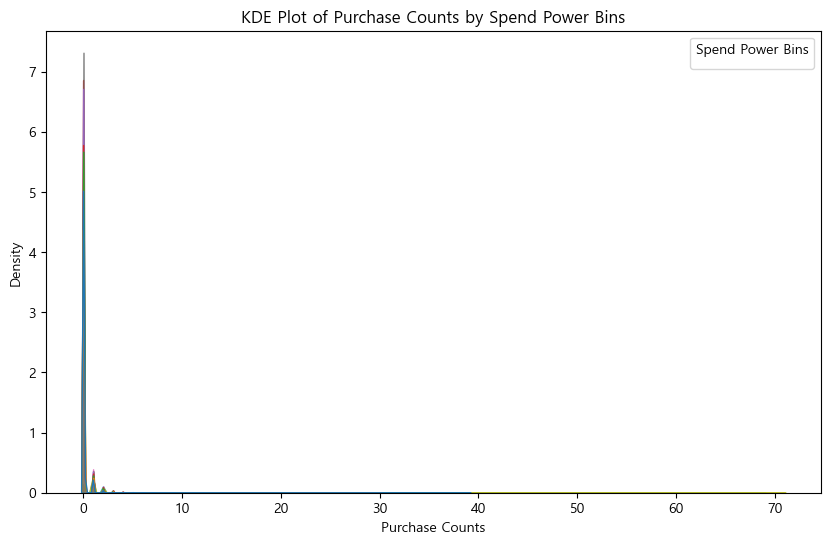

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 spend_power_bins 구간 별 각 가격대 구매 횟수 분포를 위해 데이터 변환
melted_df = df.iloc[:, 4:-7].melt(var_name='price_range', value_name='purchase_counts', ignore_index=False)
melted_df['spend_power_bins'] = df['spend_power_bins']  # spend_power_bins 추가

plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_df, x='purchase_counts', hue='spend_power_bins', common_norm=False, fill=True)

# 플롯 설정
plt.title('KDE Plot of Purchase Counts by Spend Power Bins')
plt.xlabel('Purchase Counts')
plt.ylabel('Density')
plt.legend(title='Spend Power Bins')
plt.show()

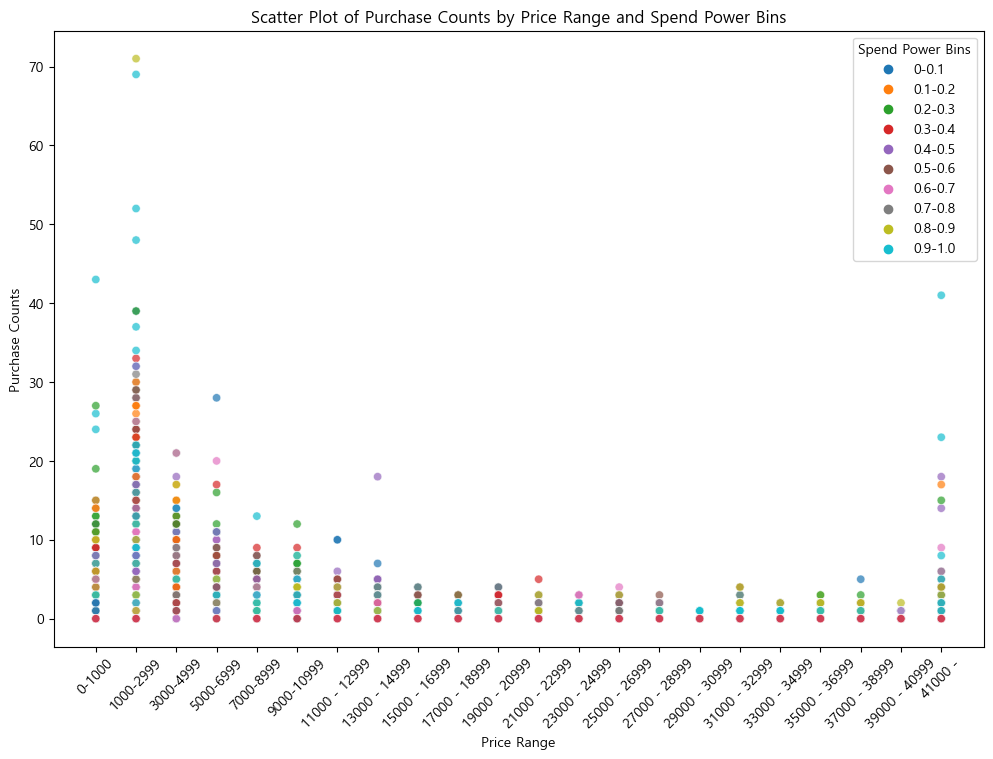

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 가격대와 유저 별 구매 횟수를 긴 형식으로 변환
melted_df = df.iloc[:, 4:-7].melt(var_name='price_range', value_name='purchase_counts', ignore_index=False)
melted_df['spend_power_bins'] = df['spend_power_bins']  # spend_power_bins 추가

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_df, x='price_range', y='purchase_counts', hue='spend_power_bins', alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.legend(title='Spend Power Bins')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [223]:
df.iloc[:, 4:-7].columns

Index(['0-1000', '1000-2999', '3000-4999', '5000-6999', '7000-8999',
       '9000-10999', '11000 - 12999', '13000 - 14999', '15000 - 16999',
       '17000 - 18999', '19000 - 20999', '21000 - 22999', '23000 - 24999',
       '25000 - 26999', '27000 - 28999', '29000 - 30999', '31000 - 32999',
       '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999',
       '41000 -'],
      dtype='object')

In [224]:
tst

,Mean_Spend_Ratio,entropy
0,0.875367,0.00
1,0.000000,0.00
2,0.694106,1.38
3,1.000000,1.00
4,0.890869,0.00
...,...,...
163933,0.973611,0.00
163934,0.933672,0.00
163935,0.451592,0.00
163936,0.626040,0.00


In [225]:
tst = df.groupby('spend_power_bins').agg(
    a_0_1000 = ('0-1000','sum'),
    a_1000_2999 = ('1000-2999','sum'),
    a_3000_4999 = ('3000-4999','sum'),
    a_5000_6999 = ('5000-6999','sum'),
    a_7000_8999 = ('7000-8999','sum'),
    a_9000_10999 = ('9000-10999','sum'),
    a_11000_12999 = ('11000 - 12999','sum'),
    a_13000_14999 = ('13000 - 14999','sum'),
    a_15000_16999 = ('15000 - 16999','sum'),
    a_17000_18999 = ('17000 - 18999','sum'),
    a_19000_20999 = ('19000 - 20999','sum'),
    a_21000_22999 = ('21000 - 22999','sum'),
    a_23000_24999 = ('23000 - 24999','sum'),
    a_25000_26999 = ('25000 - 26999','sum'),
    a_27000_28999 = ('27000 - 28999','sum'),
    a_29000_30999 = ('29000 - 30999','sum'),
    a_31000_32999 = ('31000 - 32999','sum'),
    a_33000_34999 = ('33000 - 34999','sum'),
    a_35000_36999 = ('35000 - 36999','sum'),
    a_37000_38999 = ('37000 - 38999','sum'),
    a_39000_40999 = ('39000 - 40999','sum'),
    a_41000 = ('41000 -','sum'),
)

# tst.melt(id_vars='spend_power_bins',var_name=)

SyntaxError: invalid syntax (3827041049.py, line 26)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\3848912180.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tst = df.groupby('spend_power_bins').agg(


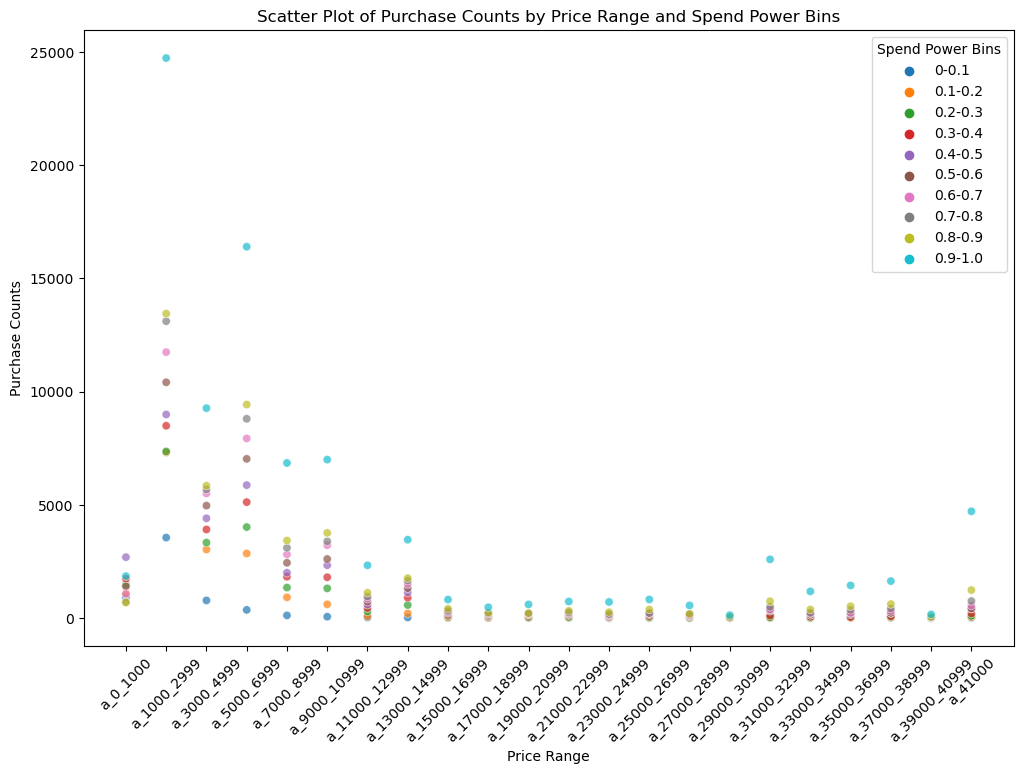

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그룹화 및 집계
tst = df.groupby('spend_power_bins').agg(
    a_0_1000=('0-1000', 'sum'),
    a_1000_2999=('1000-2999', 'sum'),
    a_3000_4999=('3000-4999', 'sum'),
    a_5000_6999=('5000-6999', 'sum'),
    a_7000_8999=('7000-8999', 'sum'),
    a_9000_10999=('9000-10999', 'sum'),
    a_11000_12999=('11000 - 12999', 'sum'),
    a_13000_14999=('13000 - 14999', 'sum'),
    a_15000_16999=('15000 - 16999', 'sum'),
    a_17000_18999=('17000 - 18999', 'sum'),
    a_19000_20999=('19000 - 20999', 'sum'),
    a_21000_22999=('21000 - 22999', 'sum'),
    a_23000_24999=('23000 - 24999', 'sum'),
    a_25000_26999=('25000 - 26999', 'sum'),
    a_27000_28999=('27000 - 28999', 'sum'),
    a_29000_30999=('29000 - 30999', 'sum'),
    a_31000_32999=('31000 - 32999', 'sum'),
    a_33000_34999=('33000 - 34999', 'sum'),
    a_35000_36999=('35000 - 36999', 'sum'),
    a_37000_38999=('37000 - 38999', 'sum'),
    a_39000_40999=('39000 - 40999', 'sum'),
    a_41000=('41000 -', 'sum'),
).reset_index()

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', hue='spend_power_bins', alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Spend Power Bins')
plt.show()

In [69]:
melted_tst

,spend_power_bins,price_range,purchase_counts
0,0-0.1,a_0_1000,910
1,0.1-0.2,a_0_1000,1101
2,0.2-0.3,a_0_1000,1471
3,0.3-0.4,a_0_1000,1732
4,0.4-0.5,a_0_1000,2691
...,...,...,...
215,0.5-0.6,a_41000,420
216,0.6-0.7,a_41000,548
217,0.7-0.8,a_41000,752
218,0.8-0.9,a_41000,1237


C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\1941847732.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tst = df.groupby('spend_power_bins').agg(


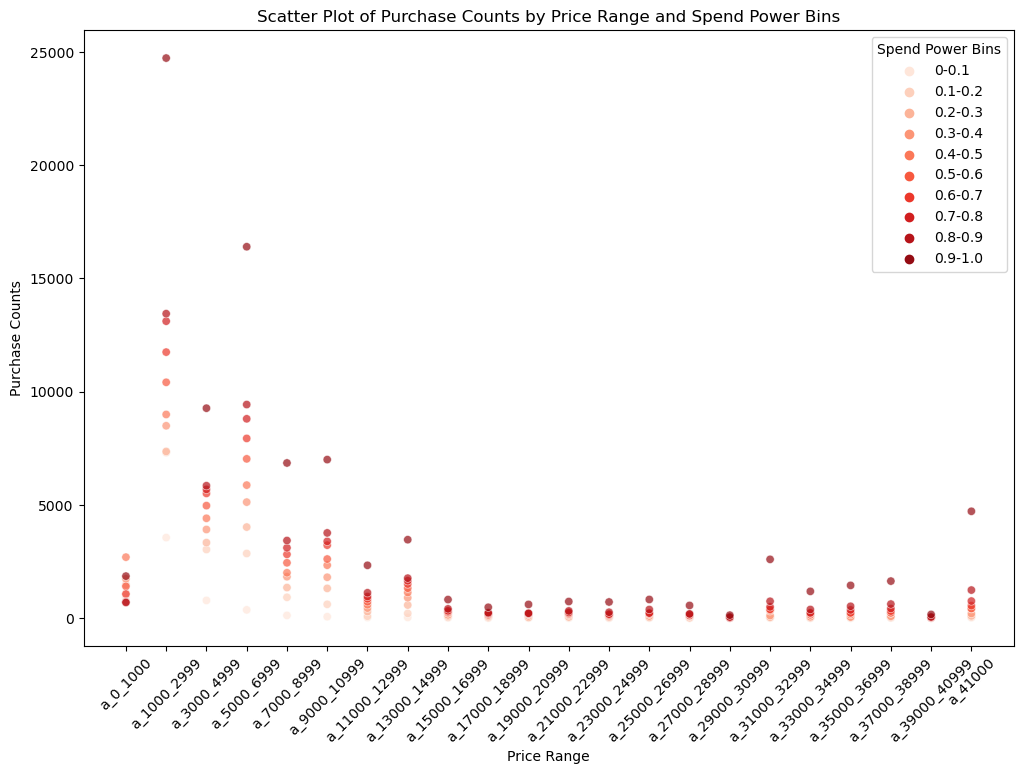

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 그룹화 및 집계
tst = df.groupby('spend_power_bins').agg(
    a_0_1000=('0-1000', 'sum'),
    a_1000_2999=('1000-2999', 'sum'),
    a_3000_4999=('3000-4999', 'sum'),
    a_5000_6999=('5000-6999', 'sum'),
    a_7000_8999=('7000-8999', 'sum'),
    a_9000_10999=('9000-10999', 'sum'),
    a_11000_12999=('11000 - 12999', 'sum'),
    a_13000_14999=('13000 - 14999', 'sum'),
    a_15000_16999=('15000 - 16999', 'sum'),
    a_17000_18999=('17000 - 18999', 'sum'),
    a_19000_20999=('19000 - 20999', 'sum'),
    a_21000_22999=('21000 - 22999', 'sum'),
    a_23000_24999=('23000 - 24999', 'sum'),
    a_25000_26999=('25000 - 26999', 'sum'),
    a_27000_28999=('27000 - 28999', 'sum'),
    a_29000_30999=('29000 - 30999', 'sum'),
    a_31000_32999=('31000 - 32999', 'sum'),
    a_33000_34999=('33000 - 34999', 'sum'),
    a_35000_36999=('35000 - 36999', 'sum'),
    a_37000_38999=('37000 - 38999', 'sum'),
    a_39000_40999=('39000 - 40999', 'sum'),
    a_41000=('41000 -', 'sum'),
).reset_index()

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# spend_power_bins의 강도에 따라 색상 매핑
# spend_power_bins의 고유 값에 따라 색상 맵 생성
unique_bins = melted_tst['spend_power_bins'].unique()
colors = sns.color_palette("Reds", len(unique_bins))  # 연한 분홍에서 진한 빨강으로 색상 생성
color_map = dict(zip(unique_bins, colors))

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', 
                hue='spend_power_bins', palette=color_map, alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Spend Power Bins')
plt.show()

In [83]:
tst

,spend_power_bins,a_0_1000,a_1000_2999,a_3000_4999,a_5000_6999,a_7000_8999,a_9000_10999,a_11000_12999,a_13000_14999,a_15000_16999,...,a_23000_24999,a_25000_26999,a_27000_28999,a_29000_30999,a_31000_32999,a_33000_34999,a_35000_36999,a_37000_38999,a_39000_40999,a_41000
0,0-0.1,910,3555,780,362,118,60,24,27,10,...,1,3,1,0,4,3,4,8,0,15
1,0.1-0.2,1101,7313,3029,2853,918,608,79,206,32,...,6,13,3,1,12,4,5,12,2,43
2,0.2-0.3,1471,7361,3333,4020,1348,1312,287,575,93,...,31,36,16,5,36,19,31,48,2,95
3,0.3-0.4,1732,8494,3913,5122,1827,1804,440,898,143,...,55,91,66,5,111,57,45,79,5,201
4,0.4-0.5,2691,8994,4408,5873,2002,2335,590,1129,223,...,91,168,94,19,318,140,156,215,11,414
5,0.5-0.6,1401,10415,4967,7033,2442,2608,723,1320,240,...,124,186,102,20,356,145,219,232,15,420
6,0.6-0.7,1060,11748,5507,7936,2815,3220,851,1505,282,...,143,222,116,19,385,211,230,310,20,548
7,0.7-0.8,715,13114,5685,8802,3105,3388,951,1648,323,...,173,217,175,16,496,232,360,422,32,752
8,0.8-0.9,687,13446,5847,9432,3425,3762,1118,1763,407,...,258,378,183,46,742,379,521,619,50,1237
9,0.9-1.0,1853,24737,9271,16403,6851,7000,2331,3462,817,...,711,822,558,129,2594,1180,1444,1633,161,4717


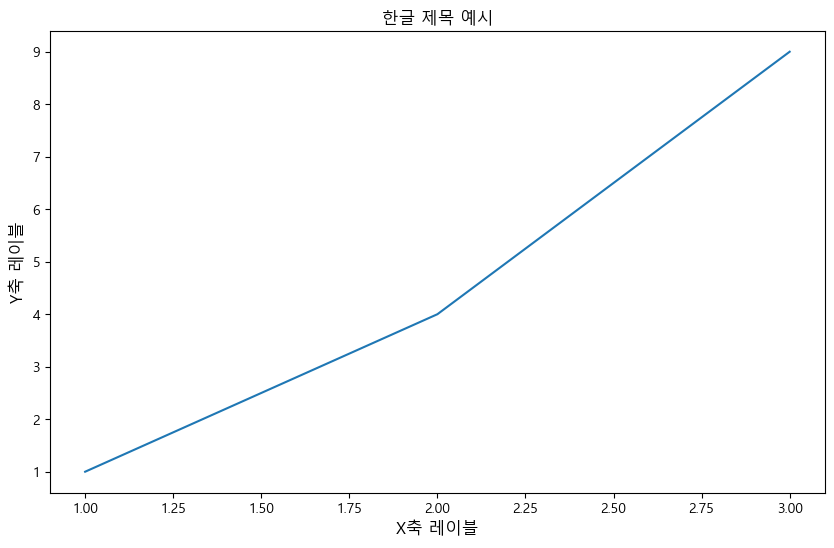

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12)

# 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 한글이 포함된 플롯 예시
plt.figure(figsize=(10, 6))
plt.title('한글 제목 예시', fontproperties=font_prop)
plt.xlabel('X축 레이블', fontproperties=font_prop)
plt.ylabel('Y축 레이블', fontproperties=font_prop)
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_power_bins'] = df['spend_power_bins'].astype(str)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_spend_power'] = df['spend_power_bins'].apply(calculate_average)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

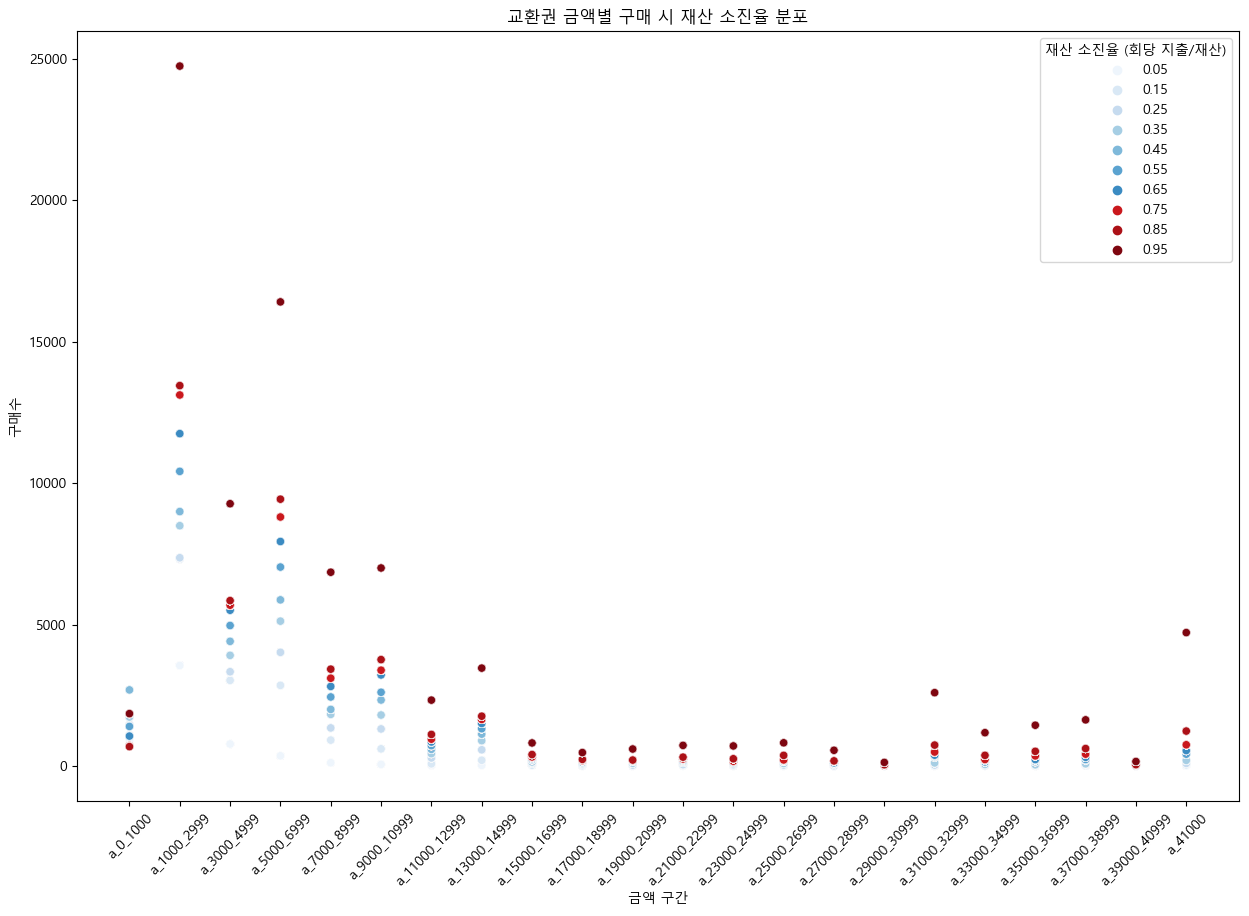

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# spend_power_bins 열에서 평균값 계산하여 새로운 열 생성
def calculate_average(bin_str):
    lower, upper = map(float, bin_str.split('-'))  # '-'로 분리하여 float로 변환
    return round((lower + upper) / 2,2)  # 평균 계산

# 새로운 열 추가
df['spend_power_bins'] = df['spend_power_bins'].astype(str)
df['average_spend_power'] = df['spend_power_bins'].apply(calculate_average)

# 0.6 이하인지 여부로 분류하는 새로운 열 추가
df['is_below_0.6'] = df['average_spend_power'] <= 0.65

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# df와 melted_tst를 merge하여 average_spend_power 추가
melted_tst = melted_tst.merge(df[['spend_power_bins', 'average_spend_power']], on='spend_power_bins', how='left')

# spend_power_bins의 강도에 따라 색상 매핑
# average_spend_power의 고유 값에 따라 색상 맵 생성
unique_bins = melted_tst['average_spend_power'].unique()

# 색상 맵 생성
colors = []
for bin in unique_bins:
    if bin <= 0.65:
        # 푸른 계열 색상 (낮을수록 연하고 높을수록 진한)
        color = sns.color_palette("Blues", as_cmap=True)(bin)
    else:
        # 빨간 계열 색상 (낮을수록 연하고 높을수록 진한)
        color = sns.color_palette("Reds", as_cmap=True)(bin)
    colors.append(color)

# 색상 매핑 딕셔너리 생성
color_map = dict(zip(unique_bins, colors))

# 스캐터 플롯 그리기
plt.figure(figsize=(15, 10))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', 
                hue='average_spend_power', palette=color_map, alpha=0.7)

# 플롯 설정
plt.title('교환권 금액별 구매 시 재산 소진율 분포')
plt.xlabel('금액 구간')
plt.ylabel('구매수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='재산 소진율 (회당 지출/재산)')
plt.show()

In [156]:
df.columns

Index(['User_ID', 'Mean_Spend_Ratio', 'Interval_Days', 'entropy', '0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -', 'low',
       'low-mid', 'mid', 'high', 'entropy_bins', 'spend_cnt',
       'spend_power_bins', 'average_spend_power', 'is_below_0.6'],
      dtype='object')

In [162]:
tst = df[[ 'entropy_bins','0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -']]
tst.melt(id_vars='entropy_bins', var_name='cash_range', value_name='entropy_count')

,entropy_bins,cash_range,entropy_count
0,0-0.2,0-1000,0
1,1.2-1.4,0-1000,0
2,1.0-1.2,0-1000,0
3,0-0.2,0-1000,0
4,0-0.2,0-1000,0
...,...,...,...
3179545,0-0.2,41000 -,0
3179546,0-0.2,41000 -,0
3179547,0-0.2,41000 -,0
3179548,0-0.2,41000 -,0


In [182]:
unique_bins.sort()
unique_bins

['0-0.2',
 '0.2-0.4',
 '0.4-0.6',
 '0.6-0.8',
 '0.8-1.0',
 '1.0-1.2',
 '1.2-1.4',
 '1.4-1.6',
 '1.6-1.8',
 '1.8-2.0',
 '2.0-2.2',
 '2.2-2.4',
 '2.4-2.6',
 '2.6-2.8',
 '2.8-3.0',
 '3.0-3.2',
 '3.2-3.4']

['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4', '2.4-2.6', '2.6-2.8', '2.8-3.0', '3.0-3.2', '3.2-3.4']


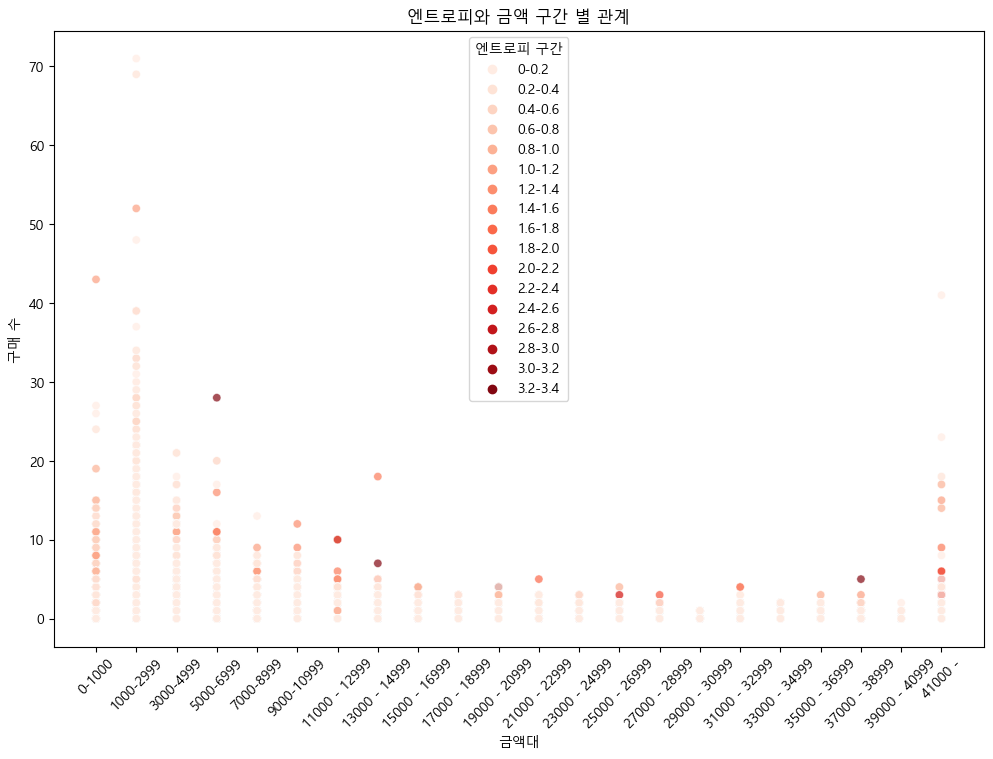

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
tst = df[[ 'entropy_bins','0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -']]

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='entropy_bins', var_name='cash_range', value_name='entropy_count')

# spend_power_bins의 강도에 따라 색상 매핑
# spend_power_bins의 고유 값에 따라 색상 맵 생성
unique_bins = melted_tst['entropy_bins'].unique()
# 기존 unique_bins를 Categorical에서 리스트로 변환
unique_bins = list(melted_tst['entropy_bins'].unique())

# '3.0-3.2' 추가
if '3.0-3.2' not in unique_bins:
    unique_bins.append('3.0-3.2')
unique_bins.sort()
print(unique_bins)

colors = sns.color_palette("Reds", len(unique_bins))  # 연한 분홍에서 진한 빨강으로 색상 생성
color_map = dict(zip(unique_bins, colors))

for bin in unique_bins:
    if bin not in color_map:
        color_map[bin] = 'gray'

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='cash_range', y='entropy_count', 
                hue='entropy_bins', palette=color_map, alpha=0.7)

# 플롯 설정
plt.title('엔트로피와 금액 구간 별 관계')
plt.xlabel('금액대')
plt.ylabel('구매 수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='엔트로피 구간')
plt.show()

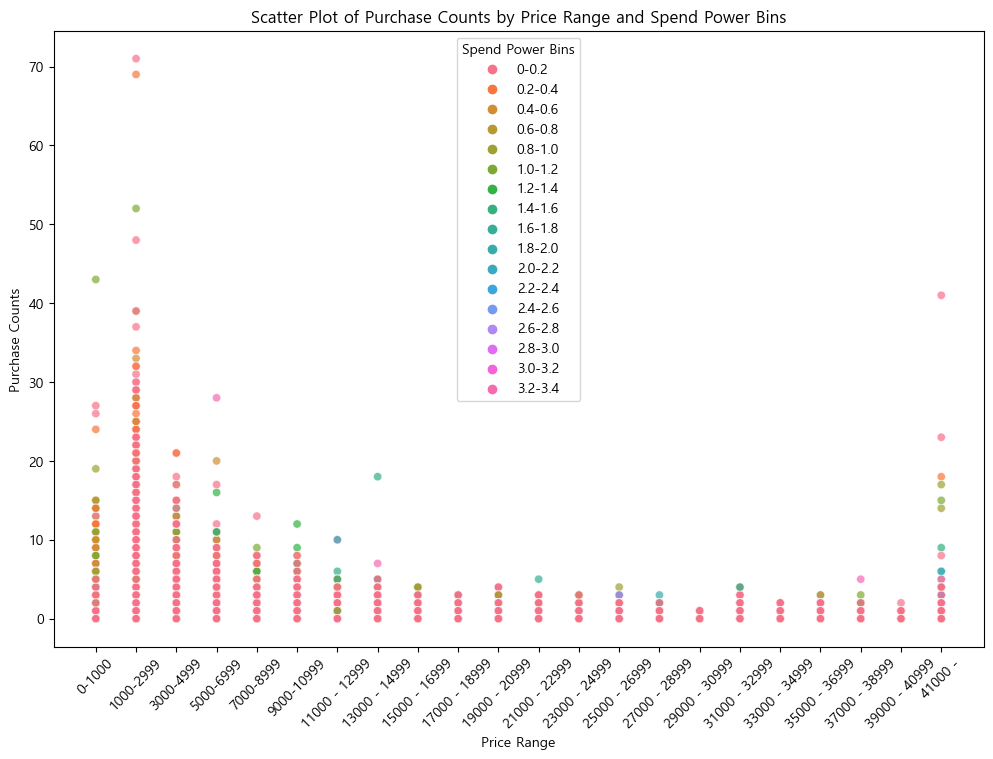

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tst = df[[ 'entropy_bins','0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -']]

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='entropy_bins', var_name='cash_range', value_name='entropy_count')

# 스캐터 플롯 그리기 (색상 팔레트 제거)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='cash_range', y='entropy_count', 
                hue='entropy_bins', alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Spend Power Bins')
plt.show()

In [189]:
tt = tst.copy()

tt.loc[:, tt.columns != 'entropy_bins'] = tt.loc[:, tt.columns != 'entropy_bins'].applymap(lambda x: 1 if x != 0 else 0)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\1830829297.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tt.loc[:, tt.columns != 'entropy_bins'] = tt.loc[:, tt.columns != 'entropy_bins'].applymap(lambda x: 1 if x != 0 else 0)


In [194]:
tt['cnt'] = tt.iloc[:,1:].sum(axis=1)

In [197]:
pd.DataFrame(tt.groupby('entropy_bins').cnt.mean())

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\695609273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(tt.groupby('entropy_bins').cnt.mean())


,cnt
entropy_bins,
0-0.2,1.000011
0.2-0.4,2.0
0.4-0.6,2.011691
0.6-0.8,2.021554
0.8-1.0,2.012517
1.0-1.2,2.019838
1.2-1.4,3.015271
1.4-1.6,3.010661
1.6-1.8,4.02381


In [134]:
purchaseer

,User_ID,Rev,Cnt
0,a841cb73-06d6-4728-b0e0-e2b70e0414fe,9900.0,1
1,e9570526-cbaa-4594-8224-f859d256e0fb,6900.0,1
2,f60bd369-7109-4710-91cc-a0d0d938e693,29900.0,1
3,28fcba61-2a32-44ab-ac6e-5345823d8e31,94700.0,3
4,769240dd-50c2-4195-a257-c08f8843544f,157800.0,2
...,...,...,...
434,843bd081-9bfd-4842-b4e7-d9706ad455cc,10400.0,1
435,6fa34135-8802-4728-9508-4f28f73a2cf3,13800.0,1
436,f95843dd-7f28-451c-ac35-193798dda049,13500.0,3
437,41f48e51-e612-42ce-86ca-036b5032b9e4,41300.0,3


In [201]:
purchaseer

,User_ID,Rev,Cnt
0,a841cb73-06d6-4728-b0e0-e2b70e0414fe,9900.0,1
1,e9570526-cbaa-4594-8224-f859d256e0fb,6900.0,1
2,f60bd369-7109-4710-91cc-a0d0d938e693,29900.0,1
3,28fcba61-2a32-44ab-ac6e-5345823d8e31,94700.0,3
4,769240dd-50c2-4195-a257-c08f8843544f,157800.0,2
...,...,...,...
434,843bd081-9bfd-4842-b4e7-d9706ad455cc,10400.0,1
435,6fa34135-8802-4728-9508-4f28f73a2cf3,13800.0,1
436,f95843dd-7f28-451c-ac35-193798dda049,13500.0,3
437,41f48e51-e612-42ce-86ca-036b5032b9e4,41300.0,3


In [139]:
ddd =pd.merge(purchaseer,df,how='left',left_on='User_ID',right_on='User_ID')

In [147]:
len(ddd[ddd['entropy'].isna()]), len(ddd[~ddd['entropy'].isna()])

(252, 187)

In [154]:
ddd.groupby('spend_power_bins').agg(
    user_id=('User_ID','count'),
    low = ('low','sum'),
    low_mid = ('low-mid','sum'), 
    mid = ('mid','sum'), 
    high = ('high','sum'),
    spend_cnt=('spend_cnt','sum'),
    rev=('Rev','sum'),
    rev_c=('Rev','count'),
    )

,user_id,low,low_mid,mid,high,spend_cnt,rev,rev_c
spend_power_bins,,,,,,,,
0-0.1,12,22,0,0,0,22,377700.0,12
0.1-0.2,31,58,6,1,19,82,992900.0,31
0.2-0.3,16,36,3,1,1,40,1170100.0,16
0.3-0.4,14,42,2,1,2,45,429780.0,14
0.4-0.5,14,51,3,0,1,54,344900.0,14
0.5-0.6,19,47,1,1,3,49,740280.0,19
0.6-0.7,21,41,8,1,5,55,1821500.0,21
0.7-0.8,12,18,2,2,2,22,307200.0,12
0.8-0.9,19,35,2,4,3,41,531500.0,19


### 구매정보 & 교환권 금액대 코호트
- 교환권 구매 금액대의 엔트로피는 낮다. 이 코호트를 활용하여 과연 구매 전환은 영향을 받았는지 본다.
- 

In [15]:
def get_spent_cohort(df):
    z = df[['User_ID','Mean_Spend_Ratio','low','low-mid','mid','high']]
    z['total'] = z.iloc[:,2:].sum(axis=1)
    z

    z['low-p'] = z['low']/z['total']
    z['low-mid-p'] = z['low-mid']/z['total']
    z['mid-p'] = z['mid']/z['total']
    z['high-p'] = z['high']/z['total']

    z['highest_category'] = z[['low-p', 'low-mid-p', 'mid-p', 'high-p']].idxmax(axis=1)
    return z


In [16]:
def get_merged_with_purchase(z):
    zz = pd.merge(purchaseer,z,how='left',left_on='User_ID',right_on='User_ID')
    zz_pc = zz[~zz['low'].isna()].groupby('highest_category').agg(
        user = ('User_ID','count'),
        Cnt = ('Cnt','sum'),
        Rev = ('Rev','sum'),
        Mean_Spend_Ratio = ('Mean_Spend_Ratio','mean'),
    ).reset_index()

    return zz_pc



In [17]:
def get_merged_result(zz_pc,z):
    zz_c = z.groupby('highest_category').agg(total_users = ('User_ID','count')).reset_index()

    zz_tt = pd.merge(zz_pc,zz_c,on='highest_category',how='left')
    zz_tt['conv'] = round(zz_tt['user']/zz_tt['total_users'])

    return zz_tt

In [265]:
zz_tt

,highest_category,user,Cnt,Rev,Mean_Spend_Ratio,total_users,conv
0,high-p,17,58,1181100.0,0.767913,16907,0.0
1,low-mid-p,17,24,440700.0,0.733715,11601,0.0
2,low-p,146,220,5465460.0,0.463052,111715,0.0
3,mid-p,7,19,386100.0,0.777199,4302,0.0


In [20]:
# get_spent_cohort(df)
(get_merged_with_purchase(get_spent_cohort(df)))

C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['total'] = z.iloc[:,2:].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['low-p'] = z['low']/z['total']
C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,highest_category,user,Cnt,Rev,Mean_Spend_Ratio
0,high-p,7,11,233700.0,0.835762
1,low-mid-p,10,14,214180.0,0.709503
2,low-p,76,106,2847080.0,0.307774
3,mid-p,2,2,33800.0,0.720542


In [21]:
get_merged_result((get_merged_with_purchase(get_spent_cohort(df))),get_spent_cohort(df))

C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['total'] = z.iloc[:,2:].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['low-p'] = z['low']/z['total']
C:\Users\Owner\AppData\Local\Temp\ipykernel_43676\3813270515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,highest_category,user,Cnt,Rev,Mean_Spend_Ratio,total_users,conv
0,high-p,7,11,233700.0,0.835762,5739,0.0
1,low-mid-p,10,14,214180.0,0.709503,5816,0.0
2,low-p,76,106,2847080.0,0.307774,52613,0.0
3,mid-p,2,2,33800.0,0.720542,1948,0.0


In [ ]:
high-p 17	16907
low-mid-p	17	11601
low-p	146	111715
mid-p	7	4302

In [ ]:
high-p	7	5739
low-mid-p	10	5816
low-p	76	52613
mid-p	2	1948

In [89]:
delta_samples

<xarray.DataArray 'x' (chain: 4, draw: 2000)>
array([[-6.63475178e-05,  8.79507658e-04,  5.80393328e-04, ...,
         1.17295808e-04,  5.02193375e-05,  1.14972369e-04],
       [ 3.01049665e-04,  4.78855630e-04,  2.12125282e-05, ...,
         2.78921832e-04,  1.06700329e-03,  7.32431992e-04],
       [ 6.91089310e-04,  2.35892631e-04,  3.96482299e-04, ...,
         5.43799296e-04,  6.19972729e-04,  3.43857880e-04],
       [ 2.93892560e-04,  7.19869922e-04,  6.71777497e-04, ...,
        -5.78942746e-05,  1.89131170e-04, -7.93074289e-05]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1029: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1029: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_A, alpha_B]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


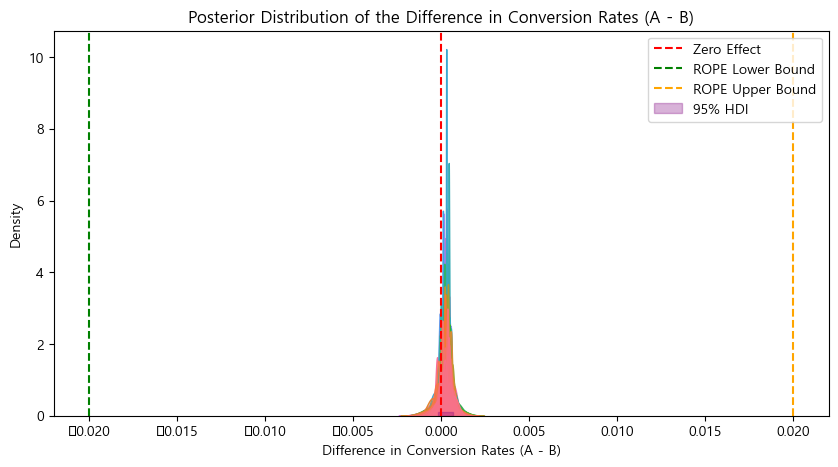

Probability that A is better than B: 0.83
Proportion of samples in ROPE: 1.00
HDI: -0.0002 to 0.0007
ROPE: -0.0200 to 0.0200
Accept A = B: HDI is completely within ROPE.


In [86]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# 데이터 설정
success_A = 146  # 전환 수
n_A = 111715     # 총 사용자 수

success_B = 17    # 전환 수
n_B = 16907      # 총 사용자 수

# PyMC 모델 정의
with pm.Model() as model:
    # 베타 분포를 사용하여 전환율에 대한 사전 분포 설정
    alpha_A = pm.Beta('alpha_A', 1, 1)  # 그룹 A의 전환율
    alpha_B = pm.Beta('alpha_B', 1, 1)  # 그룹 B의 전환율

    # 관측 데이터에 대한 우도 설정
    y_A = pm.Binomial('y_A', n=n_A, p=alpha_A, observed=success_A)
    y_B = pm.Binomial('y_B', n=n_B, p=alpha_B, observed=success_B)

    # 샘플링
    trace = pm.sample(2000)

# 전환율 비교
alpha_A_samples = trace.posterior['alpha_A']
alpha_B_samples = trace.posterior['alpha_B']

# 전환율의 차이 계산 (A - B)
delta_samples = alpha_A_samples - alpha_B_samples  # A가 B보다 얼마나 큰지 계산

# ROPE 설정 (10% of the standard deviation of delta_samples)
# rope = (np.percentile(delta_samples, 50) - 0.5 * np.std(delta_samples), 
#         np.percentile(delta_samples, 50) + 0.5 * np.std(delta_samples))
rope = [-0.02, 0.02]

# HDI 계산
hdi = az.hdi(delta_samples, hdi_prob=0.89)
hdi_values = az.hdi(delta_samples, hdi_prob=0.89).x.values

# 차이의 분포 시각화 (KDE 사용)
plt.figure(figsize=(10, 5))
sns.kdeplot(delta_samples, fill=True, color='blue', alpha=0.5)  # KDE로 부드러운 곡선 생성
plt.axvline(0, color='red', linestyle='--', label='Zero Effect')
plt.axvline(rope[0], color='green', linestyle='--', label='ROPE Lower Bound')
plt.axvline(rope[1], color='orange', linestyle='--', label='ROPE Upper Bound')

# HDI 시각화
plt.fill_betweenx(y=[0, 0.1], x1=hdi_values[0], x2=hdi_values[1], color='purple', alpha=0.3, label='95% HDI')

plt.title('Posterior Distribution of the Difference in Conversion Rates (A - B)')
plt.xlabel('Difference in Conversion Rates (A - B)')
plt.ylabel('Density')
plt.legend()
plt.show()

# 차이가 0보다 큰 비율 계산
prob_A_better_than_B = np.mean(delta_samples > 0)
print(f"Probability that A is better than B: {prob_A_better_than_B:.2f}")

# ROPE 내에 있는 샘플 비율 계산
rope_samples = np.mean((delta_samples >= rope[0]) & (delta_samples <= rope[1]))
print(f"Proportion of samples in ROPE: {rope_samples:.2f}")

# HDI와 ROPE의 관계 평가
if hdi_values[0] > rope[1]:
    recommendation = "Accept A > B: HDI is completely above ROPE."
elif hdi_values[1] < rope[0]:
    recommendation = "Accept B > A: HDI is completely below ROPE."
elif hdi_values[0] >= rope[0] and hdi_values[1] <= rope[1]:
    recommendation = "Accept A = B: HDI is completely within ROPE."
else:
    recommendation = "Keep Testing: HDI overlaps with ROPE."

# 결과 출력
print(f"HDI: {hdi_values[0]:.4f} to {hdi_values[1]:.4f}")
print(f"ROPE: {rope[0]:.4f} to {rope[1]:.4f}")
print(recommendation)

In [66]:
if hdi_values[0] > rope[1]:
    recommendation = "Accept A > B: HDI is completely above ROPE."
elif hdi_values[1] < rope[0]:
    recommendation = "Accept B > A: HDI is completely below ROPE."
elif hdi_values[0] >= rope[0] and hdi_values[1] <= rope[1]:
    recommendation = "Accept A = B: HDI is completely within ROPE."
else:
    # HDI가 ROPE와 일부만 겹치는 경우를 더 세분화하여 처리
    overlap_amount = min(hdi_values[1], rope[1]) - max(hdi_values[0], rope[0])
    if overlap_amount / (hdi_values[1] - hdi_values[0]) > 0.5:
        recommendation = "Unclear result: Significant overlap with ROPE. Consider further testing."
    else:
        recommendation = "A or B has likely won, but HDI partially overlaps with ROPE. Consider decision boundary adjustments."


In [67]:
recommendation

'A or B has likely won, but HDI partially overlaps with ROPE. Consider decision boundary adjustments.'

In [58]:
hdi_values = az.hdi(delta_samples, hdi_prob=0.95).x.values

array([-0.00095704,  0.00100273])